In [1]:
import pandas as pd
import numpy as np
import pdb
import itertools
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
from scipy import stats



curr_dir = 'C:/Users/vayze/Desktop/GitHub_Repos/LiMA/'

In [3]:
model_cols = ['Model', 'Skel1', 'SF1', 'hab_trials', 'hab_start', 'hab_end', 'skel2','sf2', 'skel_cat', "sf_cat", 'error']
model_type= ['skel','pixel1','CorNet_S',"SayCam", "ResNet_IN", "ResNet_SN", "flownet"]
actual_name = ['Skeleton', 'Pixel','CorNet-S', 'ResNext-SAY', 'ResNet-IN','ResNet-SIN', 'FlowNet']

exp = ['Exp1', 'Exp2']

skel = [['23', '31', '26'], ['31_0', '31_50']]
SF = ['Skel', 'Bulge']

In [5]:
'''
Create RDMs for each model
'''

for exn,ee in enumerate(exp):
    for mm in model_type:
        print(mm)
        mat = np.zeros((len(skel[exn]) * 2,len(skel[exn]) * 2))
        mn = [0,0]
        curr_model = pd.DataFrame(columns = model_cols)

        for sk1 in skel[exn]:
            for sf1 in SF:
                #load csv
                temp_df = pd.read_csv(f'{curr_dir}/Results/AE/{ee}_{mm}_Figure_{sk1}_{sf1}_Result.csv', 
                                      header = None, names = model_cols)

                temp_df['skel2'] = temp_df['skel2'].astype(str)

                temp_df['error_norm'] =temp_df['error'] - temp_df['hab_end']

                for sk2 in skel[exn]:
                    for sf2 in SF:
                        err = temp_df['error_norm'][(temp_df['skel2'] == sk2) & (temp_df['sf2'] == sf2)]

                        mat[mn[0], mn[1]] = err.to_numpy()[0]

                        mn[1] +=1
                mn[0] +=1
                mn[1] =0
        
        #mat = stats.zscore(mat, axis=None)
        sns.heatmap(mat,annot=True,cbar=False,xticklabels=False, yticklabels=False, square = True)
        plt.savefig(f'{curr_dir}/Infant_Data/Figures/{ee}_{mm}_rdm.png',dpi = 100,bbox_inches = 'tight', pad_inches= 0 )

        plt.close()

        


skel
pixel1
CorNet_S
SayCam
ResNet_IN
ResNet_SN
flownet
skel
pixel1
CorNet_S
SayCam
ResNet_IN
ResNet_SN
flownet


skel


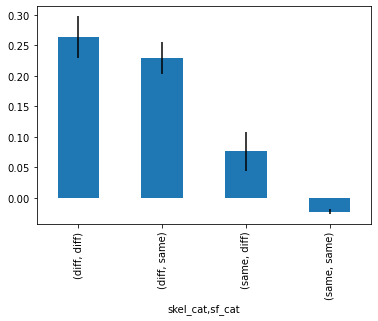

pixel1


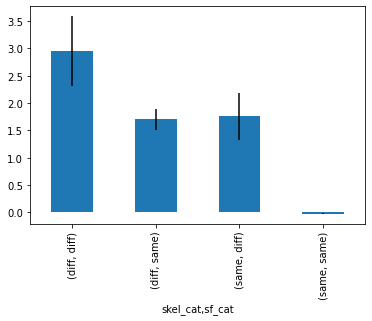

CorNet_S


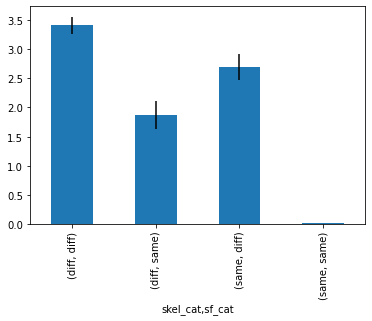

SayCam


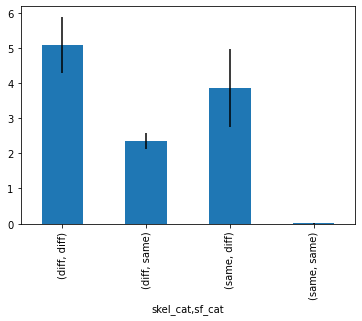

ResNet_IN


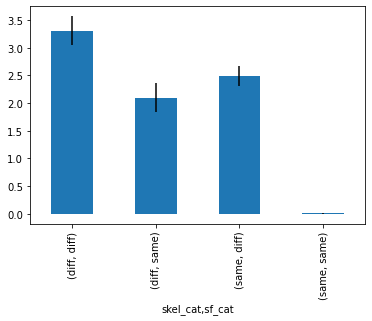

ResNet_SN


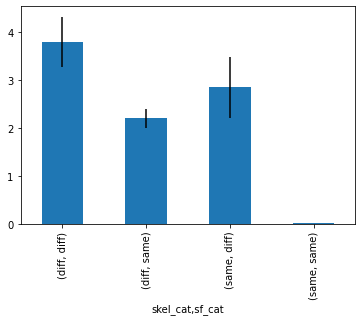

flownet


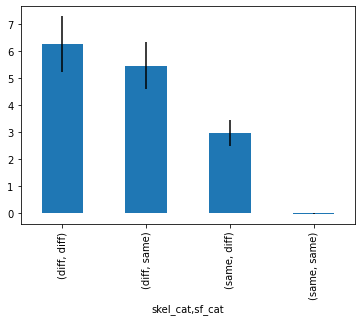

skel


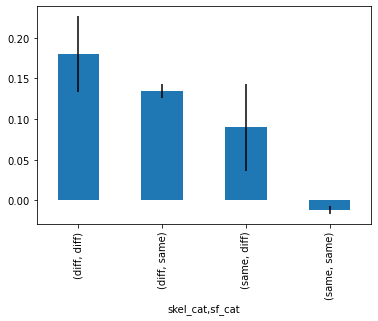

pixel1


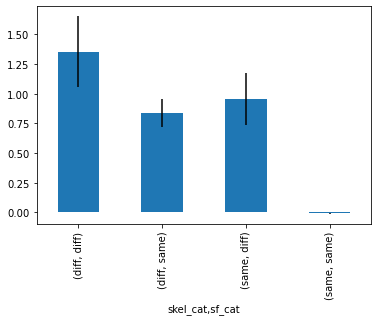

CorNet_S


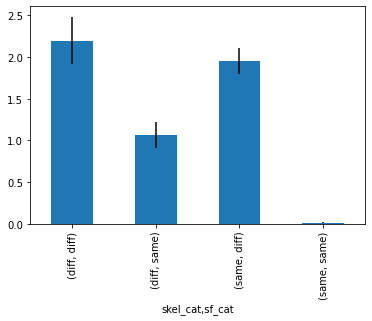

SayCam


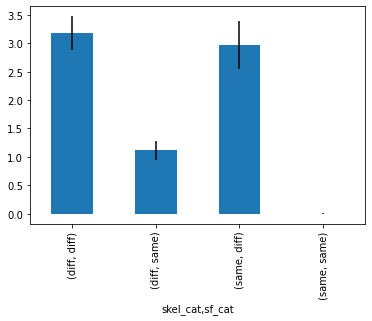

ResNet_IN


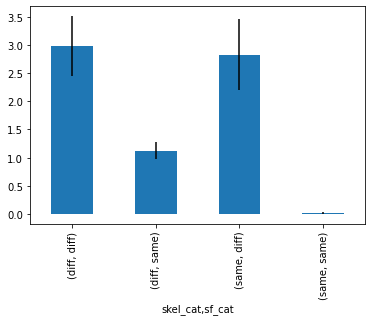

ResNet_SN


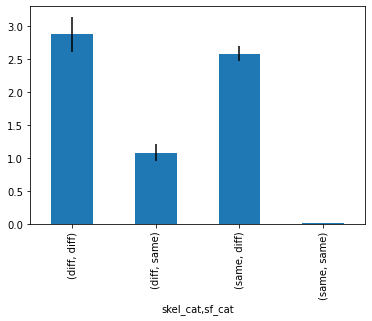

flownet


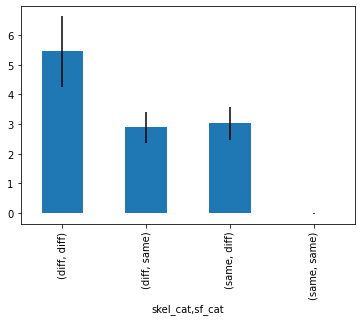

In [83]:
'''
Create bars
'''

conds = ['same_same','same_diff','diff_same', 'diff_diff']

for exn,ee in enumerate(exp):
    for mm in model_type:
        print(mm)
        mat = np.zeros((len(skel[exn]) * 2,len(skel[exn]) * 2))
        mn = [0,0]
        curr_model = pd.DataFrame(columns = model_cols)
        

        for sk1 in skel[exn]:
            for sf1 in SF:
                #load csv
                temp_df = pd.read_csv(f'{curr_dir}/Results/AE/{ee}_{mm}_Figure_{sk1}_{sf1}_Result.csv', 
                                      header = None, names = model_cols)
                
                temp_df['skel2'] = temp_df['skel2'].astype(str)

                temp_df['error_norm'] =temp_df['error'] - temp_df['hab_end']
                curr_model = curr_model.append(temp_df)
                
        means = curr_model.groupby(by=['skel_cat','sf_cat']).mean()['error_norm']
        se = curr_model.groupby(by=['skel_cat','sf_cat']).sem()['error_norm']
        
        means.plot(kind='bar', yerr = se)
        plt.pause(.001)
        plt.close()


<AxesSubplot:xlabel='skel_cat,sf_cat'>

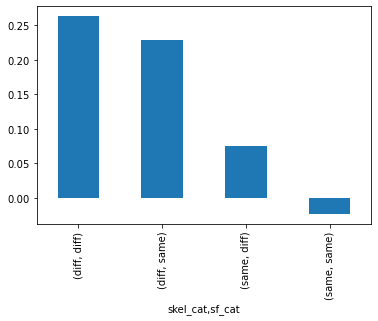

<AxesSubplot:>

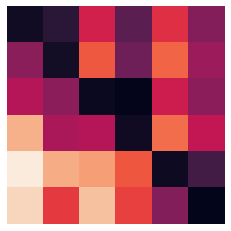

In [15]:
sk2 = 23
sf2 = 'Skel'
temp_df['error_norm'] =temp_df['error'] - temp_df['hab_end']


In [18]:
err

0   -0.016559
Name: error_norm, dtype: float64

In [14]:
sk2

'23'